In [1]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
from PIL import Image
from nltk.corpus import wordnet as wn
import nltk
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox


import warnings
warnings.filterwarnings("ignore")


/Users/hannahb./Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Concreteness Score dataset

In [2]:
# https://link.springer.com/article/10.3758/s13428-013-0403-5#MOESM1

df2 = pd.read_csv("concreteness.csv")
df2

Word  Bigram  Conc.M  Conc.SD  Unknown  Total  Percent_known  \
0                   a       0    1.46     1.14        2     30       0.933333   
1            aardvark       0    4.68     0.86        0     28       1.000000   
2               aback       0    1.65     1.07        4     27       0.851852   
3              abacus       0    4.52     1.12        2     29       0.931034   
4             abandon       0    2.54     1.45        1     27       0.962963   
...               ...     ...     ...      ...      ...    ...            ...   
39949  zebra crossing       1    4.56     0.75        1     28       0.964286   
39950  zero tolerance       1    2.21     1.45        0     29       1.000000   
39951        ZIP code       1    3.77     1.59        0     30       1.000000   
39952         zoom in       1    3.57     1.40        0     28       1.000000   
39953       zoom lens       1    4.81     0.49        1     27       0.962963   

       SUBTLEX  
0      1041179  
1           21  
2           15  
3           12  
4          413  
...        ...  
39949        0  
39950        0  
39951        0  
39952        0  
39953        0  

[39954 rows x 8 columns]

In [3]:
def make_pie(df,column,title,fname):
    df["bucket"] = (df[column].round(1))
    counts = df["bucket"].value_counts().sort_index()
    proportions = counts / counts.sum()

    # styling
    colors = [
        "#F7B7D6",  # soft header pink
        "#FDECF7",  # pale blush
        "#FFE6F2",  # gentle pastel
        "#F7D4E7",  # slightly deeper
        "#EEC2D7",
        "#F4DCEA"
    ]
    # repeat if needed
    if len(proportions) > len(colors):
        repeats = int(np.ceil(len(proportions) / len(colors)))
        colors = (colors * repeats)[:len(proportions)]

    fig, ax = plt.subplots(figsize=(7, 7))

    patches, texts, autotexts = ax.pie(
        proportions,
        labels=proportions.index,
        autopct="%1.1f%%",
        colors=colors,
        startangle=90,
        wedgeprops={"edgecolor": "#E2A8C9", "linewidth": 1.2}
    )
    # label styling
    for t in texts:
        t.set_color("#6A2E5C")
        t.set_fontsize(11)

    for t in autotexts:
        t.set_color("#4A2B3B")
        t.set_fontsize(10)
        t.set_weight("bold")

    ax.set_title(
        "Concreteness Proportions",
        fontsize=18,
        fontweight="bold",
        color="#C84C9A",
        pad=18
    )

    ax.set_ylabel("")

   
    plt.ylabel("")
    plt.rcParams["font.family"] = "DejaVu Sans"

    plt.title(title)
    plt.tight_layout()
    plt.savefig(fname)
    plt.show()

    df = df.drop(columns=["bucket"])


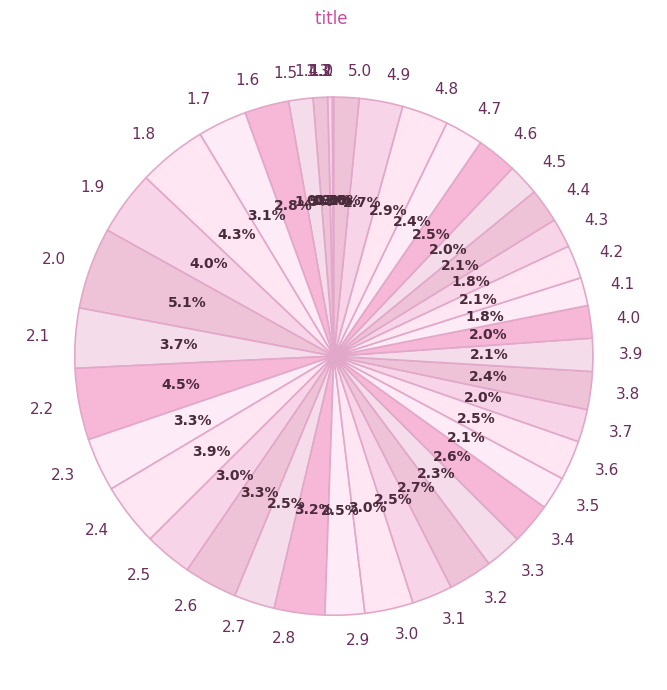

In [4]:
make_pie(df2, "Conc.M", "title ","figures/Conreteness_40K_pie.png")

In [5]:
def plot_table(df, title,fname):
    dfsmall = df.head(10)

    # modest friendly font
    plt.rcParams["font.family"] = "DejaVu Sans"

    fig, ax = plt.subplots(figsize=(14, 4))
    ax.axis("off")

    ax.set_title(
        title,
        fontsize=18,
        fontweight="bold",
        color="#C84C9A",   # modest berry-pink
        pad=22
    )

    header_color   = "#F7B7D6"         # soft muted pink
    header_border  = "#E08BB8"         # gentle berry edge
    row_colors     = ["#FFF6FB", "#FDECF7"]  # very light alternating blush
    text_color     = "#6A2E5C"         # restrained plum
    border_color   = "#E2A8C9"         # lighter pastel border

    tbl = ax.table(
        cellText=dfsmall.values,
        colLabels=dfsmall.columns,
        loc="center",
        cellLoc="center"
    )

    tbl.auto_set_font_size(False)
    tbl.set_fontsize(11)
    tbl.scale(1, 1.55)

    # HEADER STYLE (calmer)
    for (row, col), cell in tbl.get_celld().items():
        if row == 0:
            cell.set_facecolor(header_color)
            cell.set_edgecolor(header_border)
            cell.set_linewidth(1.4)
            cell.set_text_props(
                color="#4A2B3B",   # muted chocolate-plum
                weight="bold",
                fontsize=12
            )
        else:
            cell.set_facecolor(row_colors[(row - 1) % 2])
            cell.set_text_props(color=text_color)
            cell.set_edgecolor(border_color)
            cell.set_linewidth(1.0)

    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()

    table_bbox = tbl.get_window_extent(renderer)
    title_bbox = ax.title.get_window_extent(renderer)

    table_bbox_inches = table_bbox.transformed(fig.dpi_scale_trans.inverted())
    title_bbox_inches = title_bbox.transformed(fig.dpi_scale_trans.inverted())

    full_bbox = Bbox.from_extents(
        min(table_bbox_inches.x0, title_bbox_inches.x0),
        min(table_bbox_inches.y0, title_bbox_inches.y0),
        max(table_bbox_inches.x1, title_bbox_inches.x1),
        max(table_bbox_inches.y1, title_bbox_inches.y1),
    )

    fig.savefig(
        fname,
        dpi=300,
        bbox_inches=full_bbox,
        pad_inches=0.06,
    )
    plt.show()
    plt.close(fig)

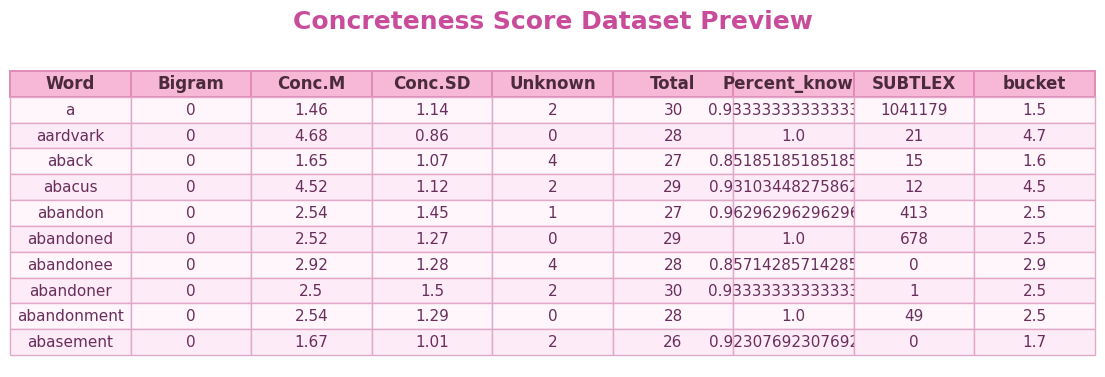

In [6]:
#df2 = df2.drop(columns=["bucket"])

plot_table(df2,"Concreteness Score Dataset Preview" ,"figures/Conreteness_40K_table.png")

In [7]:
# lookup table for concreteness for each word
conc = df2.set_index("Word")["Conc.M"]
conc

Word
a                 1.46
aardvark          4.68
aback             1.65
abacus            4.52
abandon           2.54
                  ... 
zebra crossing    4.56
zero tolerance    2.21
ZIP code          3.77
zoom in           3.57
zoom lens         4.81
Name: Conc.M, Length: 39954, dtype: float64

### WordNet: Synset_id and corresponding words dataset

In [8]:
df_synsets = pd.read_pickle("synsets.pkl")
df_synsets

synset_id                                             words
0      n00001740                                          [entity]
1      n00001930                                 [physical entity]
2      n00002137                    [abstraction, abstract entity]
3      n00002452                                           [thing]
4      n00002684                         [object, physical object]
...          ...                                               ...
82110  n15299225                                      [study hall]
82111  n15299367  [Transfiguration, Transfiguration Day, August 6]
82112  n15299585                                          [usance]
82113  n15299783                                          [window]
82114  n15300051      [9/11, 9-11, September 11, Sept. 11, Sep 11]

[82115 rows x 2 columns]

In [9]:
def synset_name(sid):
    pos = sid[0]          # "n"
    offset = int(sid[1:]) # e.g., 15299783
    s = wn.synset_from_pos_and_offset(pos, offset)
    return s.name()       # e.g., "canine.n.02"

def clean_synset_name(name):
    lemma = name.split(".")[0]          # "study_hall.n.01"
    return lemma.replace("_", " ")      # "study hall"

df_synsets["synset_name"] = df_synsets["synset_id"].apply(synset_name)
df_synsets["synset_name"] = df_synsets["synset_name"].apply(clean_synset_name)

df_synsets

synset_id                                             words  \
0      n00001740                                          [entity]   
1      n00001930                                 [physical entity]   
2      n00002137                    [abstraction, abstract entity]   
3      n00002452                                           [thing]   
4      n00002684                         [object, physical object]   
...          ...                                               ...   
82110  n15299225                                      [study hall]   
82111  n15299367  [Transfiguration, Transfiguration Day, August 6]   
82112  n15299585                                          [usance]   
82113  n15299783                                          [window]   
82114  n15300051      [9/11, 9-11, September 11, Sept. 11, Sep 11]   

           synset_name  
0               entity  
1      physical entity  
2          abstraction  
3                thing  
4               object  
...                ...  
82110       study hall  
82111  transfiguration  
82112           usance  
82113           window  
82114             9/11  

[82115 rows x 3 columns]

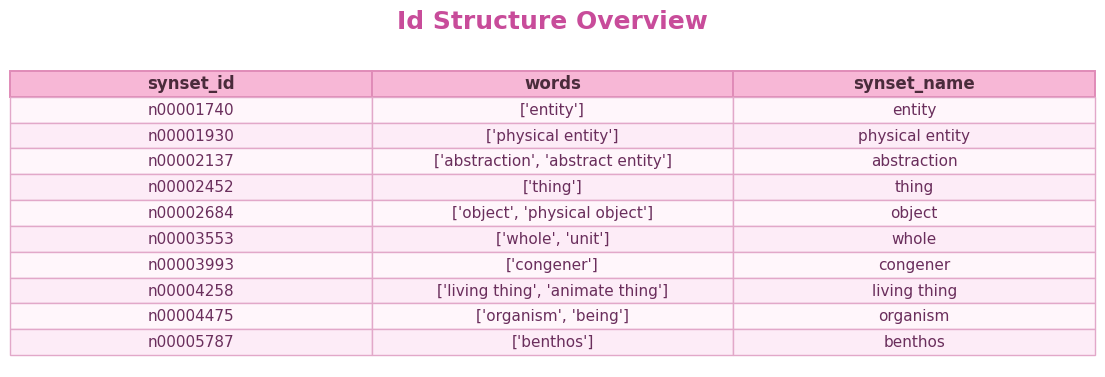

In [10]:
plot_table(df_synsets, "Id Structure Overview", "figures/Synset_id_words_name.png")

### Functions for traversing Synset Tree 

In [11]:
def nearest_valid_ancestor(score_col, synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    for path in s.hypernym_paths():
        for anc in reversed(path):
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                return anc_id
    return None

def trace_hypernym_traversal(score_col, synset_id, thresh):
    """
    Returns a string describing the sequence of synsets traversed
    until the threshold-valid ancestor is found.
    """
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return "invalid synset id"

    traces = []

    for path in s.hypernym_paths():
        collected = []
        for anc in reversed(path):
            collected.append(anc.name())   # store readable name
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                traces.append(" → ".join(collected))
                break

        if traces:
            return traces[0]

    return collected + ["NO_THRESHOLD_MET"]


### Assigning synset_ids concreteness scores by id name Approach 1:

Use score of synset id name

In [12]:
# returns the score of word with the largest value
def max_conc(words):
    vals = conc.reindex(np.array([words]))
    return vals.max()

# returns the word with the largest value
def most_concrete(words):
    vals = conc.reindex(np.array([words]))       
    return vals.idxmax()   

# apply concreteness score to every synset id in wordnet (82k)
df_synsets["concreteness"] = df_synsets["synset_name"].apply(max_conc).fillna(0)
df_synsets

synset_id                                             words  \
0      n00001740                                          [entity]   
1      n00001930                                 [physical entity]   
2      n00002137                    [abstraction, abstract entity]   
3      n00002452                                           [thing]   
4      n00002684                         [object, physical object]   
...          ...                                               ...   
82110  n15299225                                      [study hall]   
82111  n15299367  [Transfiguration, Transfiguration Day, August 6]   
82112  n15299585                                          [usance]   
82113  n15299783                                          [window]   
82114  n15300051      [9/11, 9-11, September 11, Sept. 11, Sep 11]   

           synset_name  concreteness  
0               entity          2.68  
1      physical entity          0.00  
2          abstraction          1.57  
3                thing          3.17  
4               object          3.66  
...                ...           ...  
82110       study hall          0.00  
82111  transfiguration          2.35  
82112           usance          0.00  
82113           window          4.86  
82114             9/11          0.00  

[82115 rows x 4 columns]

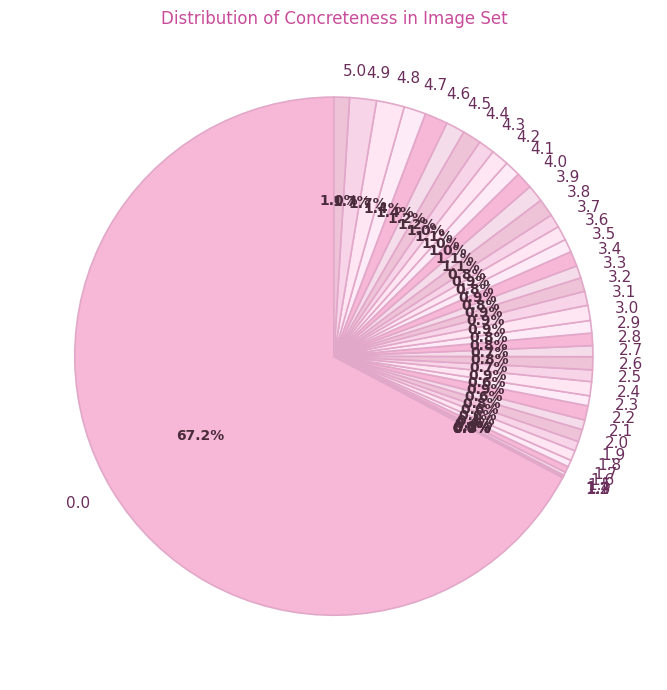

In [13]:
make_pie(df_synsets,"concreteness", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
df_synsets = df_synsets.drop(columns=["bucket"])

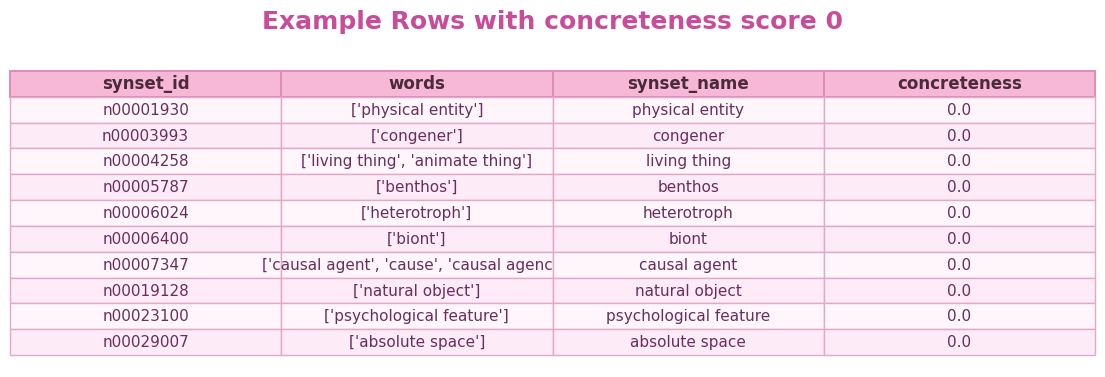

In [14]:
df_synsets_subset = df_synsets[df_synsets["concreteness"] == 0]
plot_table(df_synsets_subset, "Example Rows with concreteness score 0", "figures/Synset_id_words_name_0.png")

In [15]:
# look up for scores for synset ids
# this contains a score for each id
synset_scores = df_synsets.set_index("synset_id")["concreteness"]
synset_scores

synset_id
n00001740    2.68
n00001930    0.00
n00002137    1.57
n00002452    3.17
n00002684    3.66
             ... 
n15299225    0.00
n15299367    2.35
n15299585    0.00
n15299783    4.86
n15300051    0.00
Name: concreteness, Length: 82115, dtype: float64

### Applying scores to the 1000 labels of the images

In [16]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict)
df1

synset_id                                        description  score
0    n01440764                                 tench, Tinca tinca   0.00
1    n01443537                        goldfish, Carassius auratus   4.79
2    n01484850  great white shark, white shark, man-eater, man...   0.00
3    n01491361                    tiger shark, Galeocerdo cuvieri   0.00
4    n01494475                       hammerhead, hammerhead shark   4.28
..         ...                                                ...    ...
995  n13044778                                          earthstar   0.00
996  n13052670  hen-of-the-woods, hen of the woods, Polyporus ...   0.00
997  n13054560                                             bolete   0.00
998  n13133613                              ear, spike, capitulum   5.00
999  n15075141       toilet tissue, toilet paper, bathroom tissue   4.86

[1000 rows x 3 columns]

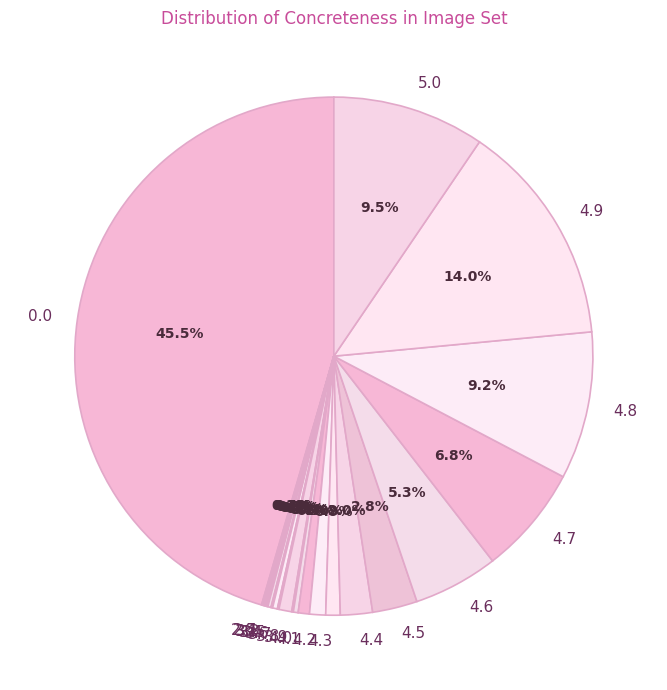

In [17]:
make_pie(df1,"score", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
df1 = df1.drop(columns=["bucket"])

### Applying Scores to the 50000 images


In [18]:
img_df = pd.read_csv("LOC_val_solution.csv") # contains image id and bounding box with id
img_df["synset"] = img_df["PredictionString"].astype(str).str[:9] # take first id
img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
...                        ...   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                        PredictionString     synset  
0                                n03995372 85 1 499 272   n03995372  
1                               n03481172 131 0 499 254   n03481172  
2                                n02108000 38 0 464 280   n02108000  
3                                n03109150 0 14 216 299   n03109150  
4      n02119789 255 142 454 329 n02119789 44 21 322 ...  n02119789  
...                                                  ...        ...  
49995                           n03388043 103 0 279 472   n03388043  
49996  n03089624 101 286 170 374 n03089624 236 282 30...  n03089624  
49997                           n01518878 82 98 439 498   n01518878  
49998                          n03874293 91 111 490 420   n03874293  
49999                           n01855032 48 92 415 227   n01855032  

[50000 rows x 3 columns]

In [19]:
# https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data?select=LOC_synset_mapping.txt

img_df = pd.read_csv("LOC_val_solution.csv") # contains image id and bounding box with id
img_df["synset_id"] = img_df["PredictionString"].astype(str).str[:9] # take first id
score_dict = dict(synset_scores)
img_df["score"] = img_df["synset_id"].map(score_dict)
img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
...                        ...   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                        PredictionString  synset_id  score  
0                                n03995372 85 1 499 272   n03995372   0.00  
1                               n03481172 131 0 499 254   n03481172   4.77  
2                                n02108000 38 0 464 280   n02108000   0.00  
3                                n03109150 0 14 216 299   n03109150   4.85  
4      n02119789 255 142 454 329 n02119789 44 21 322 ...  n02119789   0.00  
...                                                  ...        ...    ...  
49995                           n03388043 103 0 279 472   n03388043   4.77  
49996  n03089624 101 286 170 374 n03089624 236 282 30...  n03089624   3.75  
49997                           n01518878 82 98 439 498   n01518878   4.71  
49998                          n03874293 91 111 490 420   n03874293   0.00  
49999                           n01855032 48 92 415 227   n01855032   0.00  

[50000 rows x 4 columns]

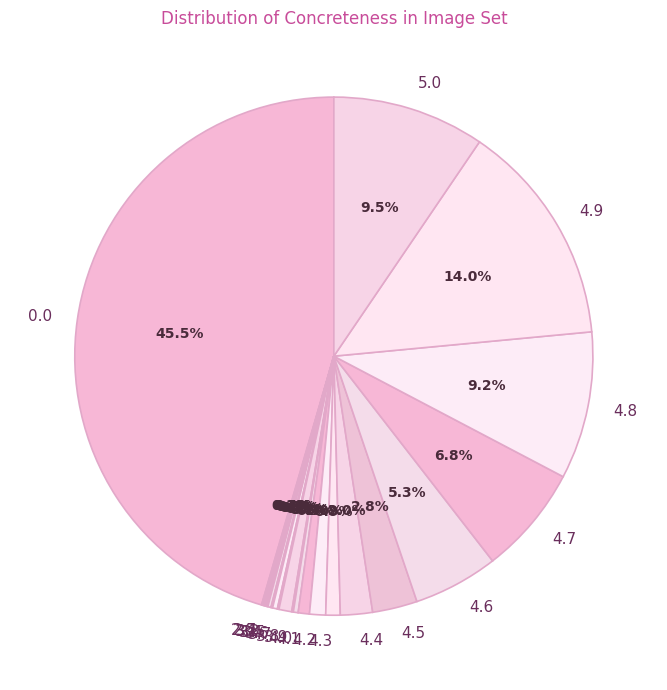

In [20]:
make_pie(img_df,"score", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
img_df = img_df.drop(columns=["bucket"])

In [21]:
# add synset names for display

img_df["synset_name"] = img_df["synset_id"].apply(synset_name) # has .n.
#img_df["synset_name"] = img_df["synset_name"].apply(clean_synset_name)

Text(0.5, 1.0, 'synset id: n02108000,\n score: 0.0, \n name: entlebucher.n.01')

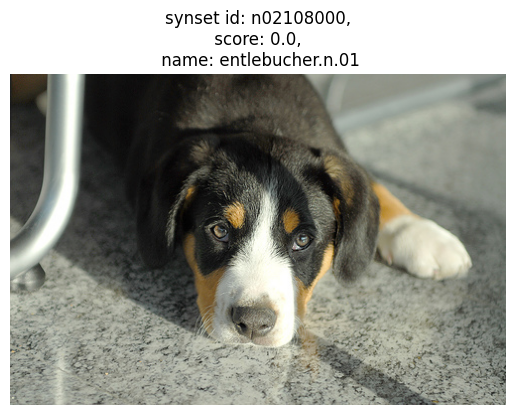

In [22]:
row = img_df.loc[img_df["synset_id"] == "n02108000"].iloc[0]

img_path = f"val/{row['ImageId']}.JPEG"
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")
plt.title(f"synset id: {row['synset_id']},\n score: {row['score']}, \n name: {row['synset_name']}")


Instead of "entlebuchner" we want to find a better label like "dog".

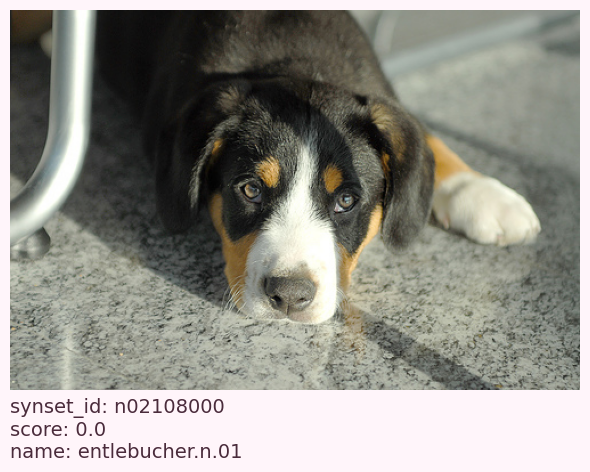

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image_with_metadata(
    df,
    synset_id,
    img_dir="val",
    figsize=(6, 7),
):
    row = df.loc[df["synset_id"] == synset_id].iloc[0]

    img_path = f"{img_dir}/{row['ImageId']}.JPEG"
    img = Image.open(img_path)

    fig, ax = plt.subplots(figsize=figsize)

    ax.imshow(img)
    ax.axis("off")

    # caption text (left-aligned, compact)
    caption = (
        f"synset_id: {row['synset_id']}\n"
        f"score: {row['score']}\n"
        f"name: {row['synset_name']}"
    )

    ax.text(
        0.0, -0.02,              # push below image
        caption,
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=14,
        color="#4A2B3B",
        family="DejaVu Sans"
    )

    fig.patch.set_facecolor("#FFF5FA")
    ax.set_facecolor("#FDECF7")

    plt.tight_layout()
    plt.show()


show_image_with_metadata(img_df, "n02108000", "val")

### Find mapping for 1000 labels

In [24]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict) # use score dictionary from before to initialize scores

df1["synset_name"] = df1["synset_id"].apply(synset_name) # has .n.
#img_df["synset_name"] = img_df["synset_name"].apply(clean_synset_name)
df1 = df1.drop(columns=["description"])

df1

synset_id  score             synset_name
0    n01440764   0.00              tench.n.01
1    n01443537   4.79           goldfish.n.01
2    n01484850   0.00  great_white_shark.n.01
3    n01491361   0.00        tiger_shark.n.01
4    n01494475   4.28         hammerhead.n.03
..         ...    ...                     ...
995  n13044778   0.00          earthstar.n.01
996  n13052670   0.00   hen-of-the-woods.n.01
997  n13054560   0.00             bolete.n.01
998  n13133613   5.00                ear.n.05
999  n15075141   4.86      toilet_tissue.n.01

[1000 rows x 3 columns]

In [25]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict) # use score dictionary from before to initialize scores

df1["synset_name"] = df1["synset_id"].apply(synset_name) # has .n.
#img_df["synset_name"] = img_df["synset_name"].apply(clean_synset_name)
df1 = df1.drop(columns=["description"])

def nearest_valid_ancestor(score_col, synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    for path in s.hypernym_paths():
        for anc in reversed(path):
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                return anc_id
    return None

def trace_hypernym_traversal(score_col, synset_id, thresh):
    """
    Returns a string describing the sequence of synsets traversed
    until the threshold-valid ancestor is found.
    """
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return "invalid synset id"

    traces = []

    for path in s.hypernym_paths():
        collected = []
        for anc in reversed(path):
            collected.append(anc.name())   # store readable name
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                traces.append(" → ".join(collected))
                break

        if traces:
            return traces[0]

    return collected + ["NO_THRESHOLD_MET"]


def assign_new_synsetid(df, thresh):

    df["mapped_synset_list"] = df.apply(
        lambda row:
            row["synset_id"] if row["score"] >= thresh
            else trace_hypernym_traversal(synset_scores,row["synset_id"], thresh),
        axis=1)
    df["mapped_synset_id"] = df.apply(
        lambda row:
            row["synset_id"] if row["score"] >= thresh
            else nearest_valid_ancestor(synset_scores,row["synset_id"], thresh),
        axis=1)
    df["mapped_score"] = df["mapped_synset_id"].map(synset_scores)
    # Create a lookup from synset_id → words list
    synset_words_lookup = df_synsets.set_index("synset_id")["words"]
    # Add a column in df1 for the mapped word list
    df["mapped_word_list"] = df["mapped_synset_id"].map(synset_words_lookup)
    return df

assign_new_synsetid(df1, 4.7)
df1

synset_id  score             synset_name  \
0    n01440764   0.00              tench.n.01   
1    n01443537   4.79           goldfish.n.01   
2    n01484850   0.00  great_white_shark.n.01   
3    n01491361   0.00        tiger_shark.n.01   
4    n01494475   4.28         hammerhead.n.03   
..         ...    ...                     ...   
995  n13044778   0.00          earthstar.n.01   
996  n13052670   0.00   hen-of-the-woods.n.01   
997  n13054560   0.00             bolete.n.01   
998  n13133613   5.00                ear.n.05   
999  n15075141   4.86      toilet_tissue.n.01   

                                    mapped_synset_list mapped_synset_id  \
0    tench.n.01 → cyprinid.n.01 → cypriniform_fish....        n02512053   
1                                            n01443537        n01443537   
2    great_white_shark.n.01 → mackerel_shark.n.01 →...        n01482330   
3    tiger_shark.n.01 → requiem_shark.n.01 → shark....        n01482330   
4                         hammerhead.n.03 → shark.n.01        n01482330   
..                                                 ...              ...   
995  [earthstar.n.01, fungus.n.01, organism.n.01, l...             None   
996  [hen-of-the-woods.n.01, fungus.n.01, organism....             None   
997  [bolete.n.01, fungus.n.01, organism.n.01, livi...             None   
998                                          n13133613        n13133613   
999                                          n15075141        n15075141   

     mapped_score                                mapped_word_list  
0            5.00                                          [fish]  
1            4.79                   [goldfish, Carassius auratus]  
2            4.93                                         [shark]  
3            4.93                                         [shark]  
4            4.93                                         [shark]  
..            ...                                             ...  
995           NaN                                             NaN  
996           NaN                                             NaN  
997           NaN                                             NaN  
998          5.00                         [ear, spike, capitulum]  
999          4.86  [toilet tissue, toilet paper, bathroom tissue]  

[1000 rows x 7 columns]

Count how many labels are now there.

In [44]:
score_dict = dict(synset_scores)

# wrapper: apply your existing mapping but with custom threshold
def run_mapping(df, threshold):
    d = df.copy()
    d["score"] = d["synset_id"].map(score_dict).fillna(0)

    d["mapped_synset_list"] = d.apply(
        lambda row:
            row["synset_id"] if row["score"] >= threshold
            else trace_hypernym_traversal(synset_scores, row["synset_id"], threshold),
        axis=1,
    )
    d["mapped_synset"] = d.apply(
        lambda row:
            row["synset_id"] if row["score"] >= threshold
            else nearest_valid_ancestor(synset_scores, row["synset_id"], threshold),
        axis=1,
    )

    d["mapped_score"] = d["mapped_synset"].map(score_dict).fillna(0)
    return d


thresholds = [0,1,2,3,3.5,4,4.5 ,4.6,4.7,4.8,4.9,4.95,5]
results = {}

for t in thresholds:
    mapped = run_mapping(df1, t)
    # number of *unique* mapped labels remaining
    n_labels = mapped["mapped_synset"].nunique()
    results[t] = n_labels

x = list(results.keys())
y = list(results.values())


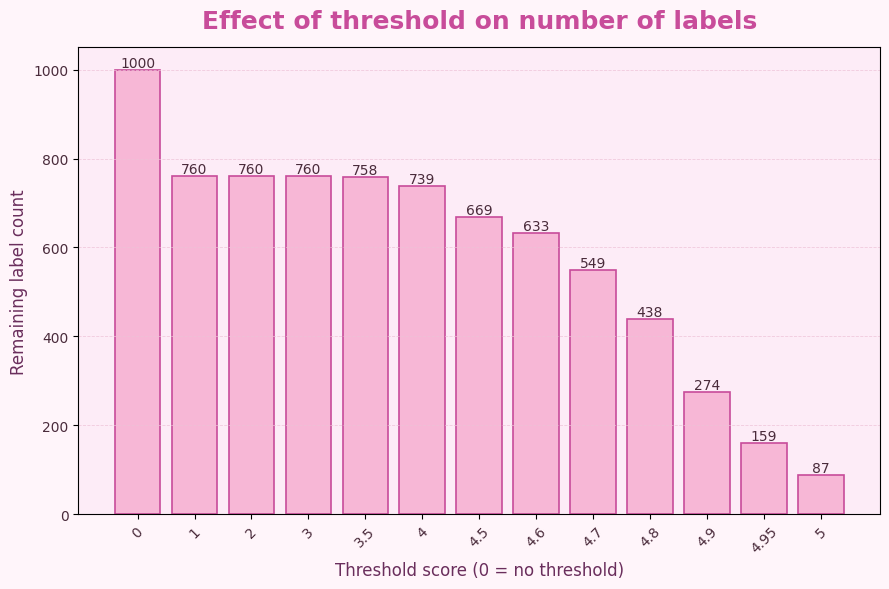

In [45]:
fig, ax = plt.subplots(figsize=(9, 6))

bars = ax.bar(
    [str(v) for v in x],
    y,
    color="#F7B7D6",
    edgecolor="#C84C9A",
    linewidth=1.2
)

# soften background
ax.set_facecolor("#FDECF7")
fig.patch.set_facecolor("#FFF5FA")

# grid (subtle)
ax.grid(
    axis="y",
    linestyle="--",
    linewidth=0.6,
    color="#EEC2D7",
    alpha=0.8
)

# labels + title
ax.set_xlabel(
    "Threshold score (0 = no threshold)",
    fontsize=12,
    color="#6A2E5C"
)
ax.set_ylabel(
    "Remaining label count",
    fontsize=12,
    color="#6A2E5C"
)

ax.set_title(
    "Effect of threshold on number of labels",
    fontsize=18,
    fontweight="bold",
    color="#C84C9A",
    pad=14
)

# tick styling
ax.tick_params(axis="x", labelrotation=45, labelcolor="#4A2B3B")
ax.tick_params(axis="y", labelcolor="#4A2B3B")

# annotate bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="#4A2B3B"
    )

plt.tight_layout()
plt.show()


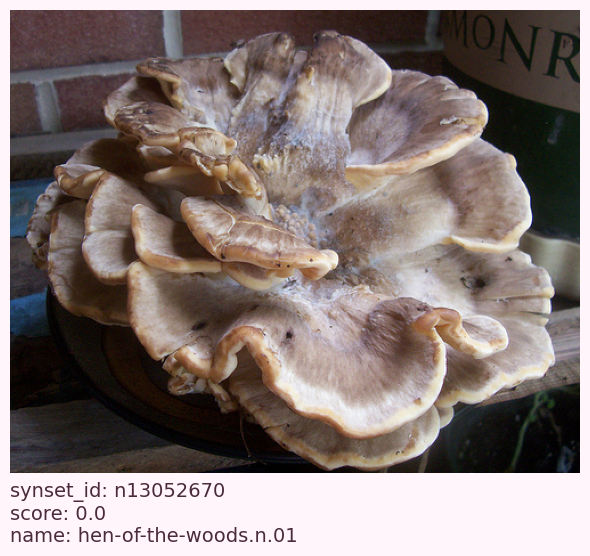

In [28]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)

df1["score"] = df1["synset_id"].map(score_dict) # use score dictionary from before to initialize scores
df1["synset_name"] = df1["synset_id"].apply(synset_name) # has .n.
assign_new_synsetid(df1, 4.9)



show_image_with_metadata(img_df, "n13052670", "val")

### Looking at the images of mapped names

We want to join these two dataframes

In [29]:
pd.set_option("display.max_colwidth", 300)


df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)

df1["score"] = df1["synset_id"].map(score_dict) # use score dictionary from before to initialize scores
df1["synset_name"] = df1["synset_id"].apply(synset_name) # has .n.

thresh = 4.8
assign_new_synsetid(df1, thresh)

df1

synset_id  \
0    n01440764   
1    n01443537   
2    n01484850   
3    n01491361   
4    n01494475   
..         ...   
995  n13044778   
996  n13052670   
997  n13054560   
998  n13133613   
999  n15075141   

                                                                             description  \
0                                                                     tench, Tinca tinca   
1                                                            goldfish, Carassius auratus   
2    great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias   
3                                                        tiger shark, Galeocerdo cuvieri   
4                                                           hammerhead, hammerhead shark   
..                                                                                   ...   
995                                                                            earthstar   
996            hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa   
997                                                                               bolete   
998                                                                ear, spike, capitulum   
999                                         toilet tissue, toilet paper, bathroom tissue   

     score             synset_name  \
0     0.00              tench.n.01   
1     4.79           goldfish.n.01   
2     0.00  great_white_shark.n.01   
3     0.00        tiger_shark.n.01   
4     4.28         hammerhead.n.03   
..     ...                     ...   
995   0.00          earthstar.n.01   
996   0.00   hen-of-the-woods.n.01   
997   0.00             bolete.n.01   
998   5.00                ear.n.05   
999   4.86      toilet_tissue.n.01   

                                                                                                                                       mapped_synset_list  \
0                             tench.n.01 → cyprinid.n.01 → cypriniform_fish.n.01 → soft-finned_fish.n.01 → teleost_fish.n.01 → bony_fish.n.01 → fish.n.01   
1                          goldfish.n.01 → cyprinid.n.01 → cypriniform_fish.n.01 → soft-finned_fish.n.01 → teleost_fish.n.01 → bony_fish.n.01 → fish.n.01   
2                                                                                               great_white_shark.n.01 → mackerel_shark.n.01 → shark.n.01   
3                                                                                                      tiger_shark.n.01 → requiem_shark.n.01 → shark.n.01   
4                                                                                                                            hammerhead.n.03 → shark.n.01   
..                                                                                                                                                    ...   
995         [earthstar.n.01, fungus.n.01, organism.n.01, living_thing.n.01, whole.n.02, object.n.01, physical_entity.n.01, entity.n.01, NO_THRESHOLD_MET]   
996  [hen-of-the-woods.n.01, fungus.n.01, organism.n.01, living_thing.n.01, whole.n.02, object.n.01, physical_entity.n.01, entity.n.01, NO_THRESHOLD_MET]   
997            [bolete.n.01, fungus.n.01, organism.n.01, living_thing.n.01, whole.n.02, object.n.01, physical_entity.n.01, entity.n.01, NO_THRESHOLD_MET]   
998                                                                                                                                             n13133613   
999                                                                                                                                             n15075141   

    mapped_synset_id  mapped_score  \
0          n02512053          5.00   
1          n02512053          5.00   
2          n01482330          4.93   
3          n01482330          4.93   
4          n01482330          4.93   
..               ...           ...   
995             None           NaN   
996             None           NaN   

In [30]:
img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
...                        ...   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                                                                                                                                                                                                                                                             PredictionString  \
0                                                                                                                                                                                                                                                                     n03995372 85 1 499 272    
1                                                                                                                                                                                                                                                                    n03481172 131 0 499 254    
2                                                                                                                                                                                                                                                                     n02108000 38 0 464 280    
3                                                                                                                                                                                                                                                                     n03109150 0 14 216 299    
4                                                                                                                                                                                                                                          n02119789 255 142 454 329 n02119789 44 21 322 295    
...                                                                                                                                                                                                                                                                                       ...   
49995                                                                                                                                                                                                                                                                n03388043 103 0 279 472    
49996  n03089624 101 286 170 374 n03089624 236 282 306 374 n03089624 1 236 498 373 n03089624 370 286 439 369 n03089624 1 249 105 373 n03089624 0 0 499 374 n03089624 170 287 235 373 n03089624 339 101 398 182 n03089624 436 281 498 373 n03089624 306 281 370 374 n03089624 168 242 234 286    
49997                                                                                                                                                                                                                                                                n01518878 82 98 439 498    
49998                                                                                                                                                                                                                                                               n03874293 91 111 490 420    
49999                                                                                                                                                                                                                                                                n01855032 48 92 415 227    

       synset_id  score                  synset_name  
0      n03995372   0.00             power_drill.n.01  
1      n03481172   4.77            

In [31]:
new_img_df = img_df.merge(
    df1[
        ["synset_id", "mapped_synset_id", "mapped_score","mapped_synset_list"]
    ],
    on="synset_id",
    how="left"
)

#new_img_df["mapped_synset_name"] = new_img_df["mapped_synset_id"].apply(synset_name)

new_img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
...                        ...   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                                                                                                                                                                                                                                                             PredictionString  \
0                                                                                                                                                                                                                                                                     n03995372 85 1 499 272    
1                                                                                                                                                                                                                                                                    n03481172 131 0 499 254    
2                                                                                                                                                                                                                                                                     n02108000 38 0 464 280    
3                                                                                                                                                                                                                                                                     n03109150 0 14 216 299    
4                                                                                                                                                                                                                                          n02119789 255 142 454 329 n02119789 44 21 322 295    
...                                                                                                                                                                                                                                                                                       ...   
49995                                                                                                                                                                                                                                                                n03388043 103 0 279 472    
49996  n03089624 101 286 170 374 n03089624 236 282 306 374 n03089624 1 236 498 373 n03089624 370 286 439 369 n03089624 1 249 105 373 n03089624 0 0 499 374 n03089624 170 287 235 373 n03089624 339 101 398 182 n03089624 436 281 498 373 n03089624 306 281 370 374 n03089624 168 242 234 286    
49997                                                                                                                                                                                                                                                                n01518878 82 98 439 498    
49998                                                                                                                                                                                                                                                               n03874293 91 111 490 420    
49999                                                                                                                                                                                                                                                                n01855032 48 92 415 227    

       synset_id  score                  synset_name mapped_synset_id  \
0      n03995372   0.00             power_drill.n.01             None   

In [32]:
# count NaN in mapped_synset_id
n_nan = new_img_df["mapped_synset_id"].isna().sum()

# split dataframe
nan_new_img_df = new_img_df[new_img_df["mapped_synset_id"].isna()]
new_img_df = new_img_df[new_img_df["mapped_synset_id"].notna()]

print("Lost images", n_nan,)
new_img_df


Lost images 10400


ImageId  \
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
5      ILSVRC2012_val_00023881   
6      ILSVRC2012_val_00011205   
...                        ...   
49993  ILSVRC2012_val_00042994   
49994  ILSVRC2012_val_00039369   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                         PredictionString  synset_id  score  \
2                                 n02108000 38 0 464 280   n02108000   0.00   
3                                 n03109150 0 14 216 299   n03109150   4.85   
4      n02119789 255 142 454 329 n02119789 44 21 322 295   n02119789   0.00   
5                                  n02666196 0 6 373 498   n02666196   4.52   
6                               n02106166 134 90 332 332   n02106166   0.00   
...                                                   ...        ...    ...   
49993                           n02823750 80 131 308 252   n02823750   0.00   
49994                           n02071294 161 75 334 241   n02071294   0.00   
49997                            n01518878 82 98 439 498   n01518878   4.71   
49998                           n03874293 91 111 490 420   n03874293   0.00   
49999                            n01855032 48 92 415 227   n01855032   0.00   

                       synset_name mapped_synset_id  mapped_score  \
2                 entlebucher.n.01        n02084071          4.85   
3                   corkscrew.n.01        n03109150          4.85   
4                     kit_fox.n.01        n02118333          4.97   
5                      abacus.n.02        n02938886          4.86   
6               border_collie.n.01        n02084071          4.85   
...                            ...              ...           ...   
49993              beer_glass.n.01        n03438257          4.82   
49994            killer_whale.n.01        n02068974          4.96   
49997                 ostrich.n.02        n01503061          5.00   
49998             paddlewheel.n.01        n04574999          4.86   
49999  red-breasted_merganser.n.01        n01846331          4.86   

                                                             mapped_synset_list  
2             entlebucher.n.01 → sennenhunde.n.01 → working_dog.n.01 → dog.n.01  
3                                                                     n03109150  
4                                                       kit_fox.n.01 → fox.n.01  
5                                                 abacus.n.02 → calculator.n.02  
6          border_collie.n.01 → shepherd_dog.n.01 → working_dog.n.01 → dog.n.01  
...                                                                         ...  
49993                                              beer_glass.n.01 → glass.n.02  
49994                                          killer_whale.n.01 → dolphin.n.02  
49997                                    ostrich.n.02 → ratite.n.01 → bird.n.01  
49998                                             paddlewheel.n.01 → wheel.n.01  
49999  red-breasted_merganser.n.01 → merganser.n.01 → sea_duck.n.01 → duck.n.01  

[39600 rows x 8 columns]

In [33]:
new_img_df["mapped_synset_name"] = new_img_df["mapped_synset_id"].apply(synset_name)

In [34]:
def show_image_id(
    df,
    ImageId,
    img_dir="val",
    figsize=(6, 7),
):
    row = df.loc[df["ImageId"] == ImageId].iloc[0]

    img_path = f"{img_dir}/{row['ImageId']}.JPEG"
    img = Image.open(img_path)

    fig, ax = plt.subplots(figsize=figsize)

    ax.imshow(img)
    ax.axis("off")

    # caption text (left-aligned, compact)
    caption = (
        f"synset_id: {row['synset_id']}\n"
        f"score: {row['score']}\n"
        f"name: {row['synset_name']}\n"
        f"mapped synset_id: {row['mapped_synset_id']}\n"
        f"mapped score: {row['mapped_score']}\n"
        f"mapped name: {row['mapped_synset_name']}\n"
        

    )

    ax.text(
        0.0, -0.02,              # push below image
        caption,
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=16,
        color="#4A2B3B",
        family="DejaVu Sans"
    )

    fig.patch.set_facecolor("#FFF5FA")
    ax.set_facecolor("#FDECF7")
    plt.title( f"{row['mapped_synset_list']}\n", fontsize= 14)
    plt.tight_layout()
    plt.show()

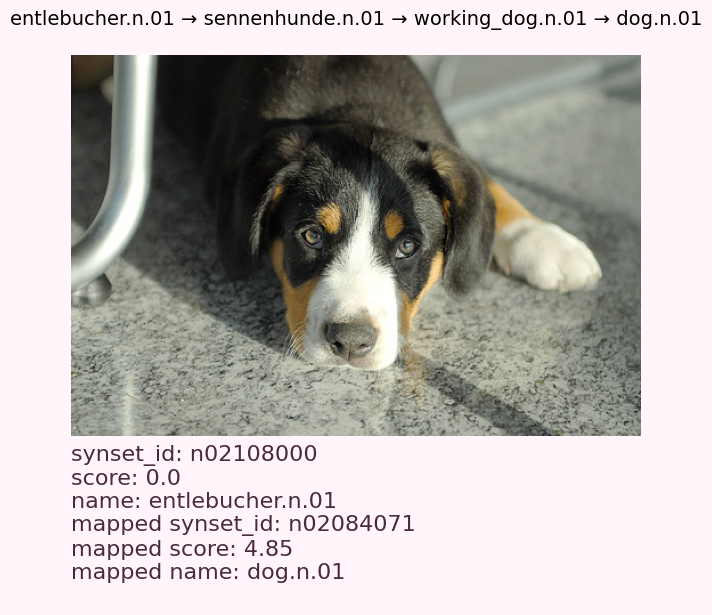

In [35]:
show_image_id(new_img_df, "ILSVRC2012_val_00026161", "val")

In [36]:
def show_triplet(
    df,
    image_ids,          # list/tuple of 3 ImageIds
    img_dir="val",
    figsize=(15, 6),
):
    assert len(image_ids) == 3

    fig, axes = plt.subplots(1, 3, figsize=figsize)

    for ax, img_id in zip(axes, image_ids):
        row = df.loc[df["ImageId"] == img_id].iloc[0]

        img_path = f"{img_dir}/{row['ImageId']}.JPEG"
        img = Image.open(img_path)

        ax.imshow(img)
        ax.axis("off")

        caption = (
            f"{row['synset_name']}\n"
            f"→ {row['mapped_synset_name']}\n"
            f"score {row['mapped_score']}"
        )

        ax.text(
            0.5, -0.08,
            caption,
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=14,
            family="DejaVu Sans"
        )
    fig.patch.set_facecolor("#FFF5FA")
    ax.set_facecolor("#FDECF7")

    plt.tight_layout()
    plt.show()

### Example Triplet

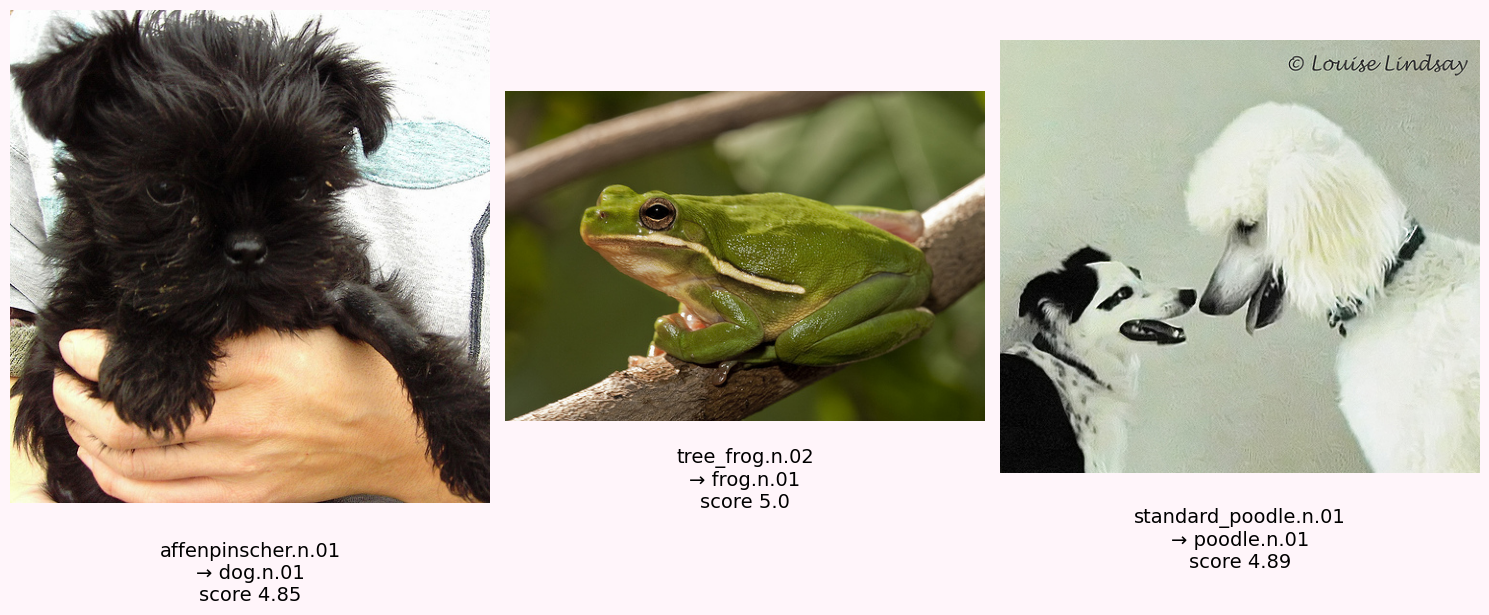

In [37]:
image_ids = new_img_df["ImageId"].sample(n=3, random_state=42).tolist()
show_triplet(new_img_df,image_ids,"val")

### Looking at lost images

In [ ]:

show_image_id(new_img_df, "ILSVRC2012_val_00026161", "val")



In [38]:
nan_new_img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
7      ILSVRC2012_val_00048237   
13     ILSVRC2012_val_00033371   
21     ILSVRC2012_val_00023865   
...                        ...   
49980  ILSVRC2012_val_00027499   
49987  ILSVRC2012_val_00009878   
49990  ILSVRC2012_val_00012862   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   

                                                                                                                                                                                                                                                                             PredictionString  \
0                                                                                                                                                                                                                                                                     n03995372 85 1 499 272    
1                                                                                                                                                                                                                                                                    n03481172 131 0 499 254    
7                                                                                                                                                                                                                                        n06874185 103 115 154 218 n06874185 346 116 397 220    
13                                                                                                                                                                                                                                                                     n03530642 0 0 498 374    
21                                                                                                                                                                                                                                         n01950731 153 72 379 374 n01950731 348 92 429 214    
...                                                                                                                                                                                                                                                                                       ...   
49980                                                                                                                                                                                                                                                                n01945685 82 29 402 415    
49987                                                                                                                                                                                                                                                                   n02447366 2 6 127 76    
49990                                                                                                                                                                                                                                                                n04456115 90 12 350 498    
49995                                                                                                                                                                                                                                                                n03388043 103 0 279 472    
49996  n03089624 101 286 170 374 n03089624 236 282 306 374 n03089624 1 236 498 373 n03089624 370 286 439 369 n03089624 1 249 105 373 n03089624 0 0 499 374 n03089624 170 287 235 373 n03089624 339 101 398 182 n03089624 436 281 498 373 n03089624 306 281 370 374 n03089624 168 242 234 286    

       synset_id  score         synset_name mapped_synset_id  mapped_score  \
0      n03995372   0.00    power_drill.n.01             None       

In [39]:
def synset_string_to_words(x):
    # case 1: already a list
    if isinstance(x, list):
        items = x

    # case 2: NaN / missing
    elif x is None or (isinstance(x, float) and pd.isna(x)):
        return x

    # case 3: string representation
    else:
        s = x.strip().lstrip("[").rstrip("]")
        items = [item.strip() for item in s.split(",")]
    words = []
    for s in items:
        if s == "NO_THRESHOLD_MET":
            words.append(s)
        else:
            words.append(s.split(".")[0].replace("_", " "))
    return words

nan_new_img_df["mapped_synset_words"] = (
    nan_new_img_df["mapped_synset_list"]
    .apply(synset_string_to_words)
)


In [43]:
# returns the score of word with the largest value
def max_conc(words):
    vals = conc.reindex(np.array([words]))
    return vals.max()
  

# apply concreteness score to every synset id in wordnet (82k)
nan_new_img_df["mapped_synset_name"] = nan_new_img_df["mapped_synset_words"].apply(max_conc).fillna(0)
nan_new_img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
7      ILSVRC2012_val_00048237   
13     ILSVRC2012_val_00033371   
21     ILSVRC2012_val_00023865   
...                        ...   
49980  ILSVRC2012_val_00027499   
49987  ILSVRC2012_val_00009878   
49990  ILSVRC2012_val_00012862   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   

                                                                                                                                                                                                                                                                             PredictionString  \
0                                                                                                                                                                                                                                                                     n03995372 85 1 499 272    
1                                                                                                                                                                                                                                                                    n03481172 131 0 499 254    
7                                                                                                                                                                                                                                        n06874185 103 115 154 218 n06874185 346 116 397 220    
13                                                                                                                                                                                                                                                                     n03530642 0 0 498 374    
21                                                                                                                                                                                                                                         n01950731 153 72 379 374 n01950731 348 92 429 214    
...                                                                                                                                                                                                                                                                                       ...   
49980                                                                                                                                                                                                                                                                n01945685 82 29 402 415    
49987                                                                                                                                                                                                                                                                   n02447366 2 6 127 76    
49990                                                                                                                                                                                                                                                                n04456115 90 12 350 498    
49995                                                                                                                                                                                                                                                                n03388043 103 0 279 472    
49996  n03089624 101 286 170 374 n03089624 236 282 306 374 n03089624 1 236 498 373 n03089624 370 286 439 369 n03089624 1 249 105 373 n03089624 0 0 499 374 n03089624 170 287 235 373 n03089624 339 101 398 182 n03089624 436 281 498 373 n03089624 306 281 370 374 n03089624 168 242 234 286    

       synset_id  score         synset_name mapped_synset_id  mapped_score  \
0      n03995372   0.00    power_drill.n.01             None       

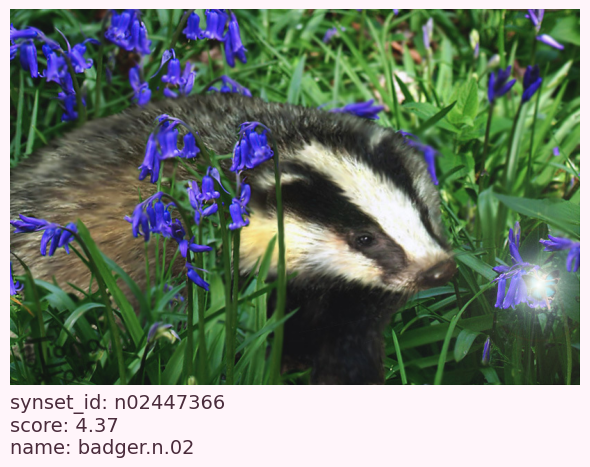

In [173]:

show_image_with_metadata(nan_new_img_df, "n02447366", "val")

images_localization/ILSVRC/Data/CLS-LOC/val
images_localization/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00039232.JPEG
images_localization/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00026344.JPEG
images_localization/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00039232.JPEG


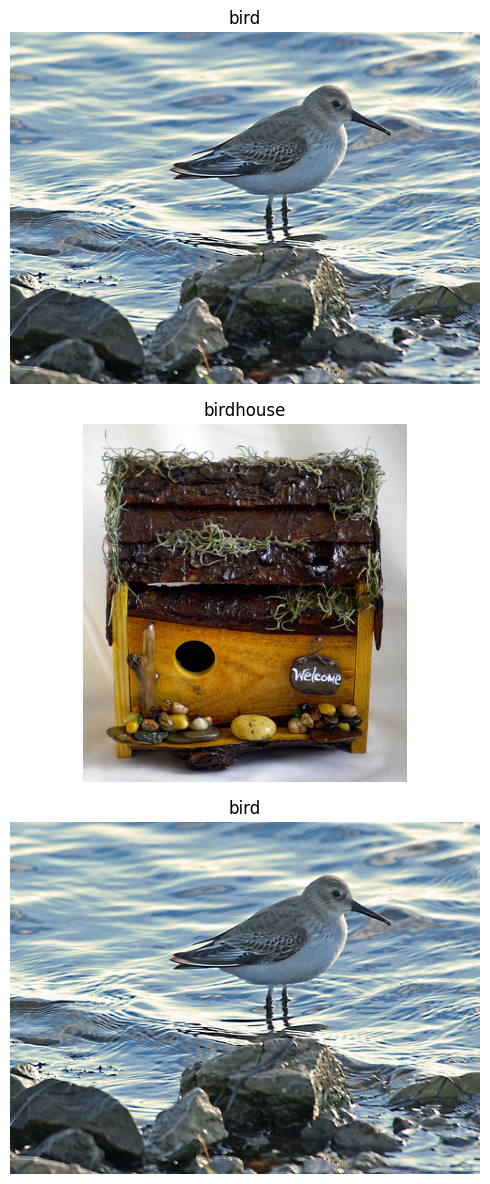

In [228]:
def show_three_by_synset(df, names, root="images_localization/ILSVRC/Data/CLS-LOC/val"):

    imgs = []
    print(root)
    for name in names:
        rows = df[df["mapped_name"] == name]
        if len(rows) == 0:
            imgs.append((None, name))
            continue
        row = rows.iloc[0]                   # pick one example
        path = f"{root}/{row['ImageId']}.JPEG"
        print(path)
        img = Image.open(path)
        imgs.append((img, name))

    fig, axes = plt.subplots(3, 1, figsize=(5, 12))

    for ax, (im, title) in zip(axes, imgs):
        if im is None:
            ax.text(0.5, 0.5, "not found", ha="center", va="center")
            ax.axis("off")
            ax.set_title(title)
            
        else:
            ax.imshow(im)
            ax.axis("off")
            ax.set_title(title)

    plt.tight_layout()
    plt.savefig("test.png")
    plt.show()

show_three_by_synset(merged, ["bird", "birdhouse", "bird"])

In [245]:
def show_triplet(df,names,root):
    for name in names:
        rows = df[df["mapped_name"] == name]

    sample = rows.sample(3)
    print(sample["mapped_name"])

    paths = [
        f"{root}/{img_id}.JPEG"
        for img_id in sample["ImageId"]
    ]

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    for ax, path in zip(axes, paths):
        img = Image.open(path)
        ax.imshow(img)
        ax.set_title(sample["mapped_name"])
        ax.axis("off")

    plt.tight_layout()
    plt.show()

show_triplet(merged, ["bird", "fox", "birdhouse"], "images_localization/ILSVRC/Data/CLS-LOC/val")

ValueError: Cannot take a larger sample than population when 'replace=False'

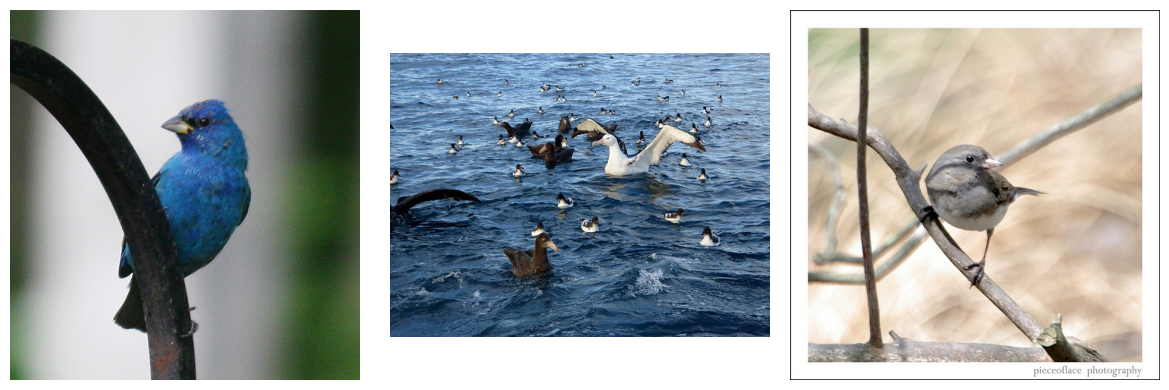

In [ ]:

def show_three_from_synset(df, syn_name, root):
    """
    df: dataframe with columns 'synset_name' and 'ImageId'
    syn_name: e.g. "bird"
    root: base path to ImageNet val images
    """
    rows = df[df["mapped_name"] == syn_name]

    if len(rows) < 3:
        raise ValueError("Not enough images for this synset.")

    sample = rows.sample(3, replace=False)

    paths = [
        f"{root}/{img_id}.JPEG"
        for img_id in sample["ImageId"]
    ]

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    for ax, path in zip(axes, paths):
        img = Image.open(path)
        ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
show_three_from_synset(
    merged,
    "bird",
    "images_localization/ILSVRC/Data/CLS-LOC/val"
)


In [ ]:
# example subset: concreteness = 5 (modify as you like)
subset = merged[merged["mapped_concreteness"] == 5].head(10)

for _, row in subset.iterrows():
    img_path = f"images_localization/ILSVRC/Data/CLS-LOC/val/{row['ImageId']}.JPEG"
    img = Image.open(img_path)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img)
    ax.axis("off")

    # put metadata below the image
    meta = (
        f"words: {row['word_list']}\n"
        f"concreteness: {row['concreteness']}"
    )
    plt.figtext(
        0.5, -0.05, meta,
        ha="center", va="top", fontsize=10
    )

    plt.tight_layout()
    plt.show()

show_three_from_synset(
    merged,
    "bird",
    "images_localization/ILSVRC/Data/CLS-LOC/val"
)


In [ ]:
from IPython.display import display, Image
from PIL import Image as PILImage
import pandas as pd

# Example: select all rows with concreteness = 5
subset = merged[merged["concreteness"] == 5]

for _, row in subset.iterrows():
    # load the image
    img_path = f"images_localization/ILSVRC/Data/CLS-LOC/val/{row['ImageId']}.JPEG"   # adjust to your actual path
    img = PILImage.open(img_path)

    # display the image + metadata
    display(img)
    print("words:", row["word_list"])
    print("concreteness:", row["concreteness"])
    print("-" * 40)


In [18]:
merged.to_csv('Image_annotation_transformed.csv', index=False)

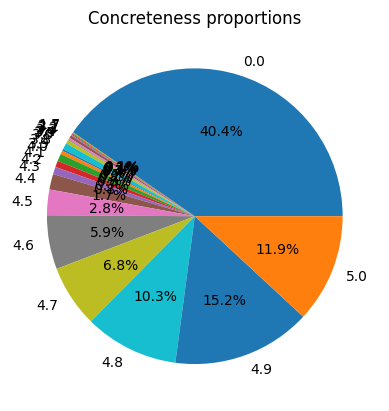

In [ ]:
merged["bucket"] = (merged["concreteness"].round(1))
counts = merged["bucket"].value_counts().sort_index()
proportions = counts / counts.sum()

proportions.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Concreteness proportions")
plt.show()

In [ ]:
df_exploded = df.explode("words")   # if wordlist column is lists
word_stats = df_exploded.groupby("words")["concreteness"].mean()


In [44]:
thresh = 4.9
# https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data?select=LOC_synset_mapping.txt

df1 = pd.read_csv("nxx_words.csv")

              
# String of words into list of words
df1["word_list"] = df1["description"].str.split(r"\s*,\s*")

# add word with highest score
df1["most concrete word"] = df1["word_list"].apply(most_concrete)

# give NaN lowest score of 0 since they dont contain a single word used in 40k concreteness
df1["concreteness"] = df1["word_list"].apply(max_conc).fillna(0)


df1["mapped_synset"] = df1.apply(
    lambda row:
        row["synset_id"] if row["concreteness"] >= thresh
        else nearest_valid_ancestor(row["synset_id"], thresh),
    axis=1
)

df1["mapped_concreteness"] = df1["mapped_synset"].map(synset_scores)

# Create a lookup from synset_id → words list
synset_words_lookup = df_synsets.set_index("synset_id")["words"]

# Add a column in df1 for the mapped word list
df1["mapped_word_list"] = df1["mapped_synset"].map(synset_words_lookup)

# description is redundant
df1 = df1.drop(columns=["description"])

pd.set_option('display.max_rows', None)
df1

synset_id                                          word_list  \
0    n01440764                               [tench, Tinca tinca]   
1    n01443537                      [goldfish, Carassius auratus]   
2    n01484850  [great white shark, white shark, man-eater, ma...   
3    n01491361                  [tiger shark, Galeocerdo cuvieri]   
4    n01494475                     [hammerhead, hammerhead shark]   
5    n01496331       [electric ray, crampfish, numbfish, torpedo]   
6    n01498041                                         [stingray]   
7    n01514668                                             [cock]   
8    n01514859                                              [hen]   
9    n01518878                        [ostrich, Struthio camelus]   
10   n01530575              [brambling, Fringilla montifringilla]   
11   n01531178                   [goldfinch, Carduelis carduelis]   
12   n01532829        [house finch, linnet, Carpodacus mexicanus]   
13   n01534433                                  [junco, snowbird]   
14   n01537544  [indigo bunting, indigo finch, indigo bird, Pa...   
15   n01558993        [robin, American robin, Turdus migratorius]   
16   n01560419                                           [bulbul]   
17   n01580077                                              [jay]   
18   n01582220                                           [magpie]   
19   n01592084                                        [chickadee]   
20   n01601694                              [water ouzel, dipper]   
21   n01608432                                             [kite]   
22   n01614925  [bald eagle, American eagle, Haliaeetus leucoc...   
23   n01616318                                          [vulture]   
24   n01622779   [great grey owl, great gray owl, Strix nebulosa]   
25   n01629819  [European fire salamander, Salamandra salamandra]   
26   n01630670                   [common newt, Triturus vulgaris]   
27   n01631663                                              [eft]   
28   n01632458          [spotted salamander, Ambystoma maculatum]   
29   n01632777          [axolotl, mud puppy, Ambystoma mexicanum]   
30   n01641577                       [bullfrog, Rana catesbeiana]   
31   n01644373                             [tree frog, tree-frog]   
32   n01644900  [tailed frog, bell toad, ribbed toad, tailed t...   
33   n01664065   [loggerhead, loggerhead turtle, Caretta caretta]   
34   n01665541  [leatherback turtle, leatherback, leathery tur...   
35   n01667114                                       [mud turtle]   
36   n01667778                                         [terrapin]   
37   n01669191                         [box turtle, box tortoise]   
38   n01675722                                     [banded gecko]   
39   n01677366             [common iguana, iguana, Iguana iguana]   
40   n01682714   [American chameleon, anole, Anolis carolinensis]   
41   n01685808                        [whiptail, whiptail lizard]   
42   n01687978                                            [agama]   
43   n01688243             [frilled lizard, Chlamydosaurus kingi]   
44   n01689811                                 [alligator lizard]   
45   n01692333                [Gila monster, Heloderma suspectum]   
46   n01693334                    [green lizard, Lacerta viridis]   
47   n01694178          [African chameleon, Chamaeleo chamaeleon]   
48   n01695060  [Komodo dragon, Komodo lizard, dragon lizard, ...   
49   n01697457  [African crocodile, Nile crocodile, Crocodylus...   
50   n01698640    [American alligator, Alligator mississipiensis]   
51   n01704323                                      [triceratops]   
52   n01728572    [thunder snake, worm snake, Carphophis amoenus]   
53   n01728920    [ringneck snake, ring-necked snake, ring snake]   
54   n01729322            [hognose snake, puff adder, sand viper]   
55   n01729977                         [green snake, grass snake]   
56   n01734418                            [king snake, kingsnake]   
57 

In [39]:
df1["mapped_synset"].nunique()


323